<a href="https://colab.research.google.com/github/Efind2/Artificial-intelligence/blob/main/Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic

    def __lt__(self, other):
        return self.heuristic < other.heuristic

In [9]:
def greedy_best_first_search_hierarchical(graph, start, goal, heuristic, region_map):
    priority_queue = []  # Antrian prioritas berdasarkan nilai heuristik
    heapq.heappush(priority_queue, Node(start, heuristic[start]))  # Masukkan node awal

    visited = set()  # Menyimpan node yang sudah dikunjungi
    path = {start: None}  # Menyimpan jalur dari node yang dieksplorasi

    while priority_queue:
        current_node = heapq.heappop(priority_queue).name  # Ambil node dengan heuristik terkecil

        if current_node == goal:  # Jika goal ditemukan, rekonstruksi jalur
            return reconstruct_path(path, start, goal)

        visited.add(current_node)  # Tandai node sebagai sudah dikunjungi

        # Eksplorasi tetangga dalam region yang sama
        current_region = region_map[current_node]
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] == current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

        # Eksplorasi tetangga di region lain
        for neighbor in graph[current_node]:
            if neighbor not in visited and region_map[neighbor] != current_region:
                heapq.heappush(priority_queue, Node(neighbor, heuristic[neighbor]))
                if neighbor not in path:
                    path[neighbor] = current_node

    return None  # Jika tidak ditemukan jalur

In [10]:
def reconstruct_path(path, start, goal):
    current = goal
    result_path = []

    while current is not None:
        result_path.append(current)  # Tambahkan node ke jalur
        current = path[current]  # Pindah ke node induk

    result_path.reverse()  # Urutkan jalur agar dari start ke goal
    return result_path

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, path, pos, region_map):
    G = nx.Graph()

    # Tambahkan edge ke graf
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    plt.figure(figsize=(10, 8))  # Atur ukuran gambar

    # Gambar node dan edge
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue',
            font_size=15, font_weight='bold', edge_color='gray')

    # Sorot jalur hasil pencarian
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='lightgreen')

    # Tambahkan informasi region pada graf
    for node, region in region_map.items():
        plt.text(pos[node][0], pos[node][1] - 0.2, f"Region {region}", fontsize=12, color='black')

    plt.title("Greedy Best-First Search for Hierarchical Routing", size=20)
    plt.show()


In [12]:
# Complex graph with hierarchical regions
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['I', 'J'],
    'F': ['K'],
    'G': ['L', 'M'],
    'H': [],
    'I': [], 'J': [], 'K': [], 'L': [], 'M': []
}

# Heuristic values (assumed for this example)
heuristic = {
    'A': 8, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'F': 5, 'G': 4,
    'H': 3, 'I': 2, 'J': 2, 'K': 3, 'L': 2, 'M': 1
}

# Define regions for the hierarchical routing (nodes belonging to different regions)
region_map = {
    'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3, 'G': 3,
    'H': 2, 'I': 2, 'J': 2, 'K': 3, 'L': 3, 'M': 3
}


Path from A to M: ['A', 'C', 'G', 'M']


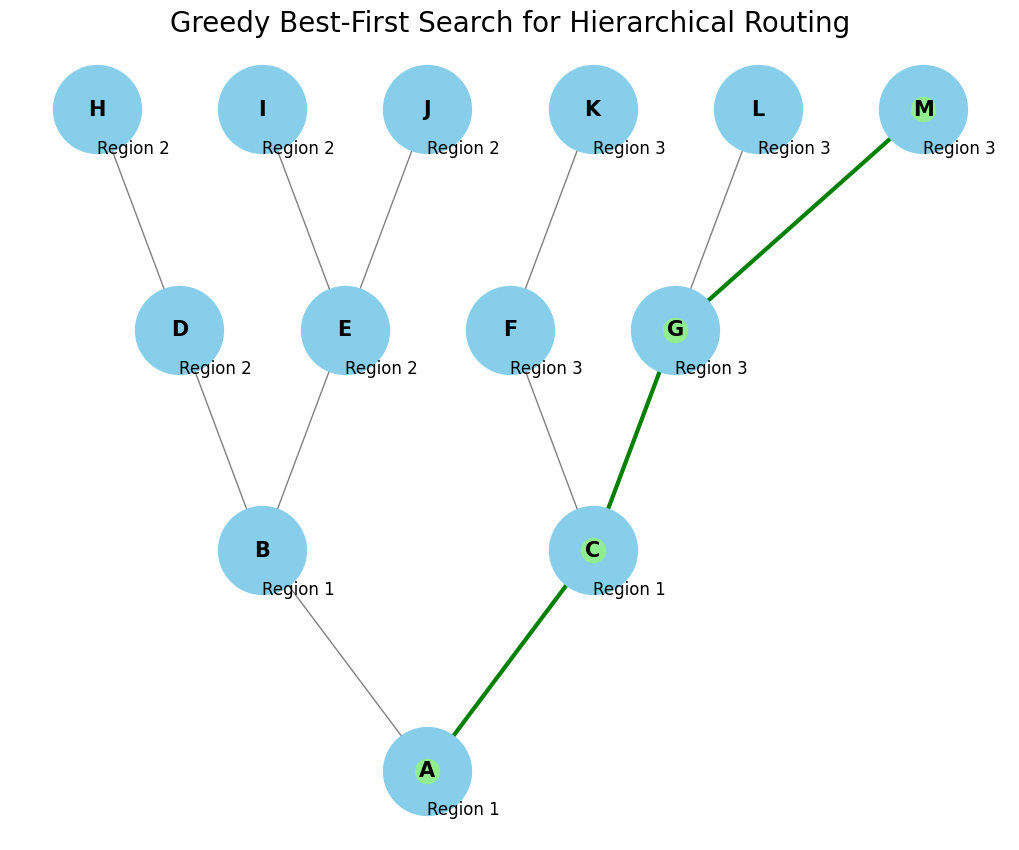

In [13]:
# Define positions for better visualization layout (can be modified)
pos = {
    'A': (0, 0), 'B': (-1, 1), 'C': (1, 1), 'D': (-1.5, 2),
    'E': (-0.5, 2), 'F': (0.5, 2), 'G': (1.5, 2), 'H': (-2, 3),
    'I': (-1, 3), 'J': (0, 3), 'K': (1, 3), 'L': (2, 3), 'M': (3, 3)
}

# Perform Greedy Best-First Search for hierarchical routing
start_node = 'A'
goal_node = 'M'
result_path = greedy_best_first_search_hierarchical(graph, start_node, goal_node, heuristic, region_map)

print("Path from {} to {}: {}".format(start_node, goal_node, result_path))

# Visualize the graph and the found path
visualize_graph(graph, result_path, pos, region_map)